## 划分数据集

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('insurance_data_preprocessed.csv')

In [3]:
X = data.drop('annual_medical_cost', axis=1)
X = X.drop(['avg_claim_amount', 'total_claims_paid'], axis=1, errors='ignore')
y = data['annual_medical_cost']
#
flag_standard = False # 是否标准化特征
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

Feature correlations with annual_medical_cost (sorted):
monthly_premium              0.965337
annual_premium               0.965337
risk_score                   0.304500
chronic_count                0.294810
is_high_risk                 0.249887
                               ...   
provider_quality            -0.003952
employment_status_Retired   -0.004191
region_East                 -0.004323
education                   -0.004434
income                      -0.006051
Length: 61, dtype: float64


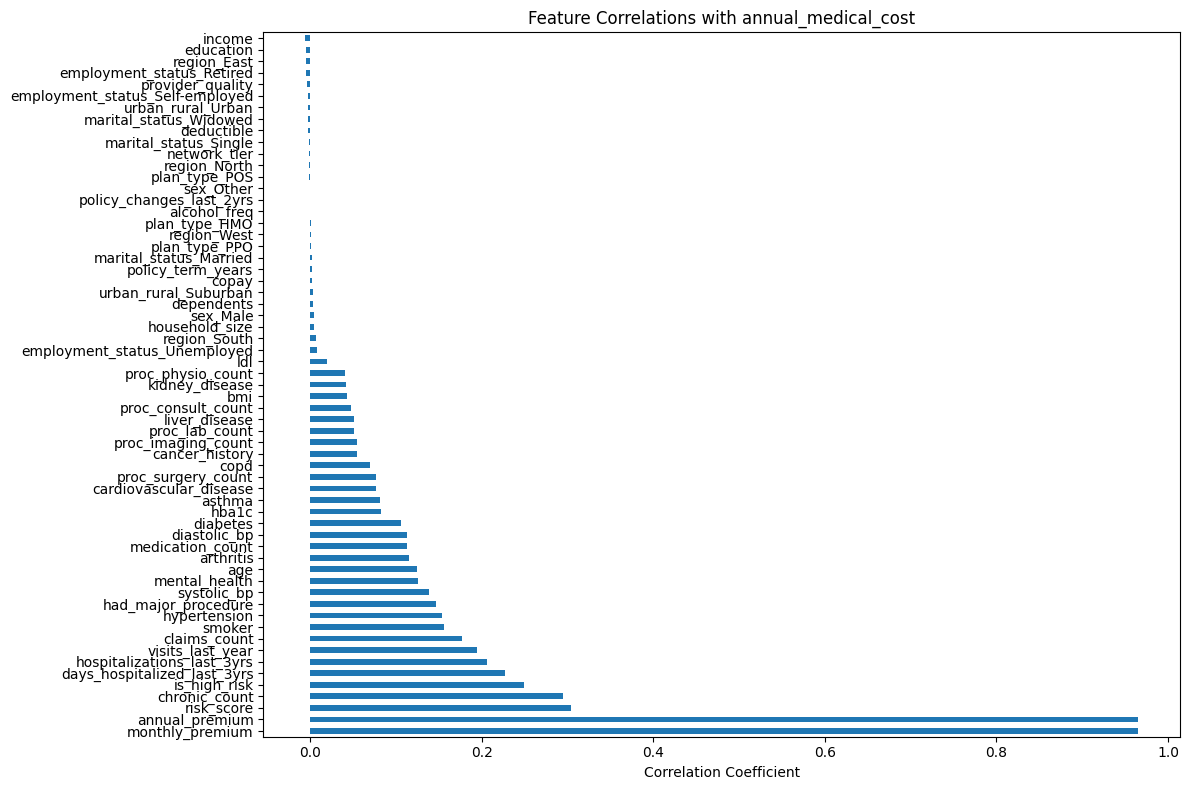

monthly_premium              0.965337
annual_premium               0.965337
risk_score                   0.304500
chronic_count                0.294810
is_high_risk                 0.249887
                               ...   
provider_quality            -0.003952
employment_status_Retired   -0.004191
region_East                 -0.004323
education                   -0.004434
income                      -0.006051
Length: 61, dtype: float64

In [4]:
# Calculate correlation between all features and target variable
correlation_with_target = X.corrwith(y).sort_values(ascending=False)

print("Feature correlations with annual_medical_cost (sorted):")
print(correlation_with_target)

# Plot correlation bar chart
plt.figure(figsize=(12, 8))
correlation_with_target.plot(kind='barh')
plt.title('Feature Correlations with annual_medical_cost')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()
correlation_with_target

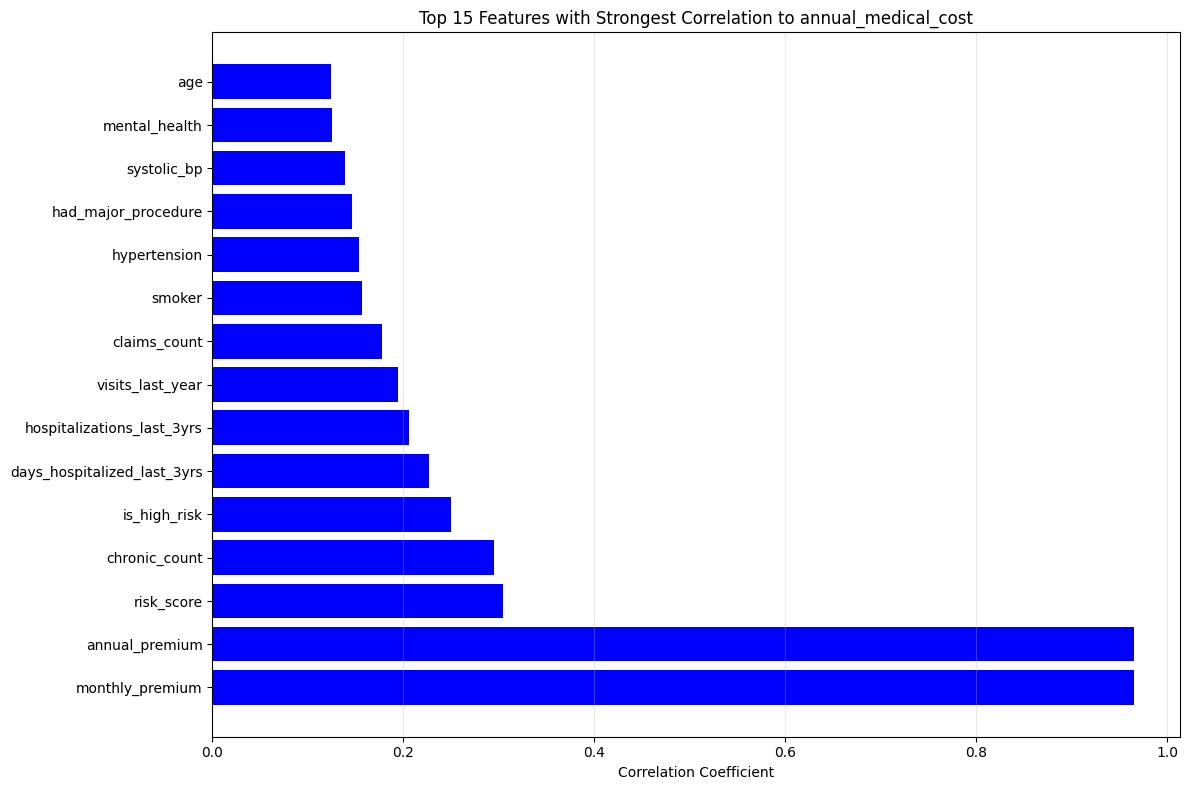

monthly_premium                0.965337
annual_premium                 0.965337
risk_score                     0.304500
chronic_count                  0.294810
is_high_risk                   0.249887
days_hospitalized_last_3yrs    0.227331
hospitalizations_last_3yrs     0.206187
visits_last_year               0.194621
claims_count                   0.177475
smoker                         0.156570
hypertension                   0.153212
had_major_procedure            0.146424
systolic_bp                    0.139085
mental_health                  0.125708
age                            0.124782
dtype: float64

In [5]:
top_features_abs = correlation_with_target.abs().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'blue' for x in correlation_with_target[top_features_abs.index]]

plt.barh(range(len(top_features_abs)), correlation_with_target[top_features_abs.index], color=colors)
plt.yticks(range(len(top_features_abs)), top_features_abs.index)
plt.xlabel('Correlation Coefficient')
plt.title('Top 15 Features with Strongest Correlation to annual_medical_cost')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
top_features_abs

## 使用全部的特征

In [6]:
## 设置模型
models = {
    # 线性回归 - 添加L2正则化
    "Linear Regression": LinearRegression(),
    
    # 岭回归 - 调整正则化强度
    "Ridge Regression": Ridge(
        alpha=1.0,                       # 正则化强度
        random_state=42
    ),
    
    # 决策树回归 - 强正则化防止过拟合
    "Decision Tree Regression": DecisionTreeRegressor(
        random_state=42,
        max_depth=15,                    # 限制树的最大深度
        min_samples_split=50,            # 内部节点再划分所需最小样本数
        min_samples_leaf=20,             # 叶节点最少样本数
        max_features='sqrt',             # 每次分裂考虑的特征数
        ccp_alpha=0.01                   # 代价复杂度剪枝
    ),
    
    # 随机森林回归 - 中等正则化
    "Random Forest Regression": RandomForestRegressor(
        random_state=42,
        n_estimators=100,                # 树的数量
        max_depth=15,                    # 限制每棵树的深度
        min_samples_split=50,            # 分裂所需最小样本数
        min_samples_leaf=20,             # 叶节点最小样本数
        max_features='sqrt',             # 特征采样策略
        bootstrap=True,                  # 使用自助采样
        max_samples=0.8,                 # 每棵树使用的样本比例
        ccp_alpha=0.01                   # 代价复杂度剪枝
    ),
    
    # 梯度提升回归 - 调整学习率和复杂度
    "Gradient Boosting Regression": GradientBoostingRegressor(
        random_state=42,
        n_estimators=100,                # 弱学习器数量
        learning_rate=0.1,               # 学习率
        max_depth=15,                     # 基学习器深度（通常较浅）
        min_samples_split=50,            # 分裂所需最小样本数
        min_samples_leaf=20,             # 叶节点最小样本数
        subsample=0.8,                   # 样本采样比例
        max_features='sqrt',             # 特征采样比例
        alpha=0.9,                        # 分位数损失参数
        ccp_alpha=0.01  
    ),
    
    # 神经网络回归 - 添加正则化和早停
    "MLP Regressor": MLPRegressor(
        hidden_layer_sizes=(50, 25),     # 网络结构
        activation='relu',
        solver='adam',
        alpha=0.001,                     # L2正则化参数
        batch_size=64,                   # 批大小
        learning_rate='adaptive',        # 自适应学习率
        early_stopping=True,             # 早停法
        validation_fraction=0.1,         # 验证集比例
        n_iter_no_change=10,             # 早停耐心值
        max_iter=500,                    # 最大迭代次数
        random_state=42
    )
}

Regression Models Evaluation of all feature:
Model: Linear Regression
模型在训练集上的评估结果：
R2 Score: 0.963464198772879
MSE Score: 361767.700484864
MAE Score: 324.5733059539797

模型在测试集上的评估结果：
R2 Score: 0.9652648808685848
MSE Score: 349126.8563816872
MAE Score: 325.7316499150917
--------------------------------------------------
time: 0.18414521217346191

Model: Ridge Regression
模型在训练集上的评估结果：
R2 Score: 0.9634637287931956
MSE Score: 361772.354097584
MAE Score: 324.5777772787691

模型在测试集上的评估结果：
R2 Score: 0.9652666888976912
MSE Score: 349108.6836638738
MAE Score: 325.71343313592325
--------------------------------------------------
time: 0.07277274131774902

Model: Decision Tree Regression
模型在训练集上的评估结果：
R2 Score: 0.7750681640882019
MSE Score: 2227214.6856121407
MAE Score: 750.6284373514819

模型在测试集上的评估结果：
R2 Score: 0.7502153631588505
MSE Score: 2510615.4005938116
MAE Score: 815.7120734854907
--------------------------------------------------
time: 0.19146490097045898

Model: Random Forest Regression

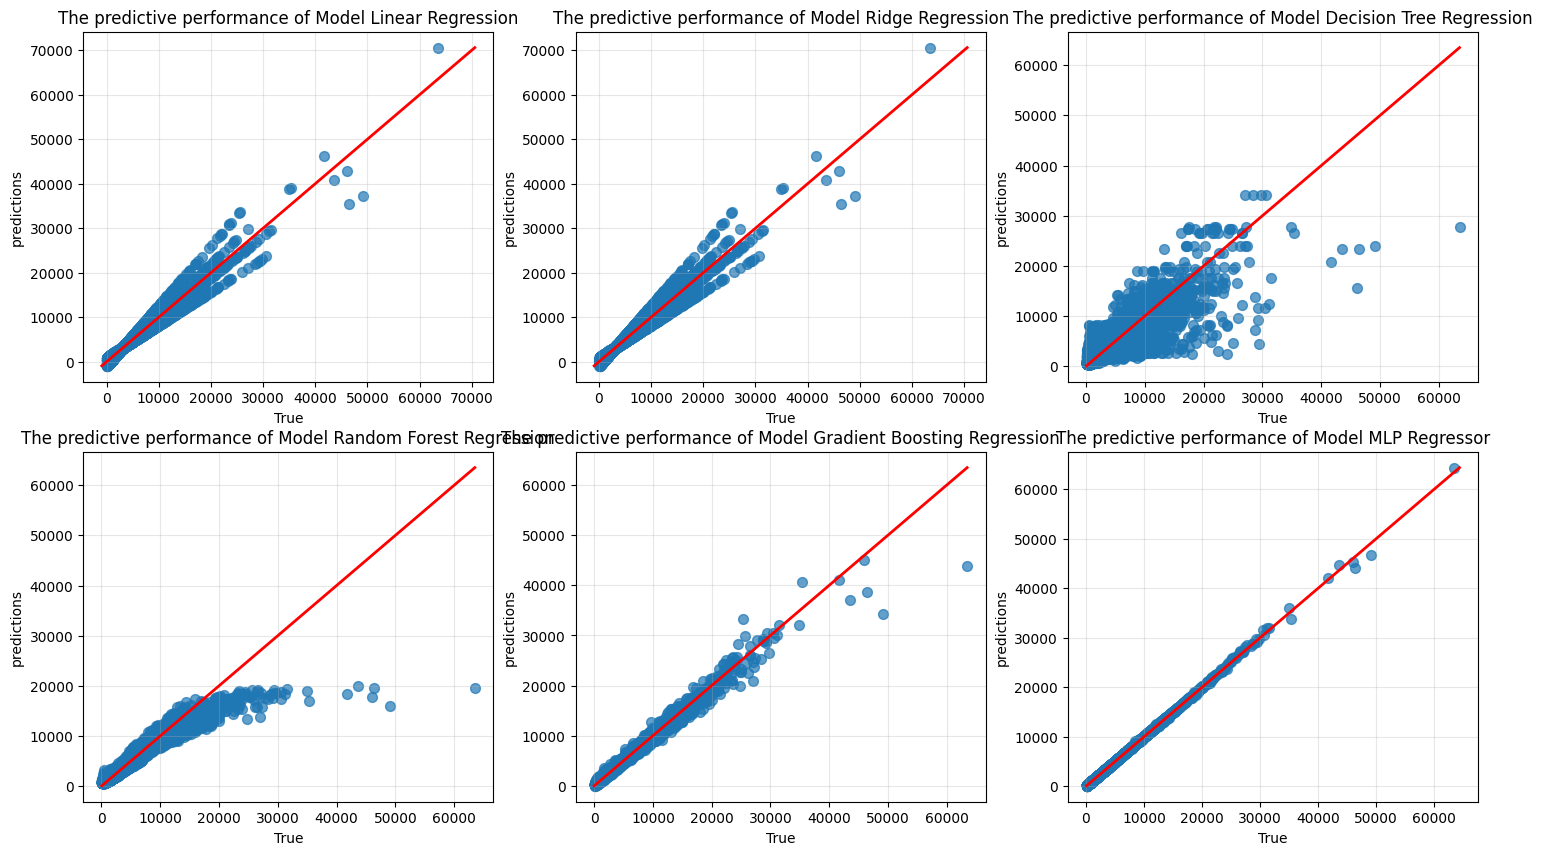

In [7]:

flag_standard = True # 是否标准化特征

def regression_train(X_train, X_test, models, y_train=y_train, y_test=y_test):
    n_models = len(models)
    n_cols = 3
    n_rows = (n_models + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
    if n_models == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    for idx, (name, model) in  enumerate(models.items()):
        time_start = time.time()
        model.fit(X_train, y_train)
        y_hat = model.predict(X_train)
        r2_score_train = r2_score(y_train, y_hat)
        mse_score_train = mean_squared_error(y_train, y_hat)
        mae_score_train = mean_absolute_error(y_train, y_hat)

        predictions = model.predict(X_test)
        r2_score_model = r2_score(y_test, predictions)
        mse_score = mean_squared_error(y_test, predictions)
        mae_score = mean_absolute_error(y_test, predictions)

        ax = axes[idx]
        ax.scatter(y_test, predictions, alpha=0.7, s=50)  
        # 添加y=x的红线
        min_val = min(y_test.min(), predictions.min())
        max_val = max(y_test.max(), predictions.max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r-', linewidth=2, label='y=x')
             
        ax.set_xlabel('True')
        ax.set_ylabel('predictions')
        ax.set_title(f'The predictive performance of Model {name}')
        ax.grid(True, alpha=0.3)

        print("Model:", name)
        print("模型在训练集上的评估结果：")
        print("R2 Score:", r2_score_train)
        print("MSE Score:", mse_score_train)
        print("MAE Score:", mae_score_train)
        print()
        print("模型在测试集上的评估结果：")
        print("R2 Score:", r2_score_model)
        print("MSE Score:", mse_score)
        print("MAE Score:", mae_score)
        print('-'*50)
        time_end = time.time()
        print(f"time: {time_end - time_start}")
        print()

# 使用全部的特征进行训练并评估模型
print("Regression Models Evaluation of all feature:")
if flag_standard:
    scaler1 = StandardScaler()
    X_train1 = scaler1.fit_transform(X_train)
    X_test1 = scaler1.transform(X_test)
regression_train(X_train=X_train1, X_test=X_test1, models=models)

## 使用部分特征

In [8]:
df1 = data.monthly_premium*12 - data.annual_premium
df1.mean(), df1.std()

(-5.451076587577897e-06, 0.03494334204547701)

monthly_premium 和 annual_premium 是高度相关的特征，因为：

均值接近0（-5.45e-06），说明 monthly_premium * 12 ≈ annual_premium

标准差很小（0.035），说明两者差异很小。

因此只保留其中一个即可，这里选择保留 annual_premium 。

In [9]:
X_train2 = X_train.drop('monthly_premium', axis=1)
X_test2 = X_test.drop('monthly_premium', axis=1)

### 只选取前 10 个重要的特征进行建模
使用Gradient Boosting分析特征的重要性，然后选取前10个最重要的特征进行训练模型并评价模型。

前 10 个重要性特征排序:
             feature  importance
23    annual_premium    0.942934
16      network_tier    0.056212
17        deductible    0.000661
15             hba1c    0.000102
5                bmi    0.000019
22        risk_score    0.000017
29              copd    0.000015
12       systolic_bp    0.000015
11  medication_count    0.000007
2          education    0.000007


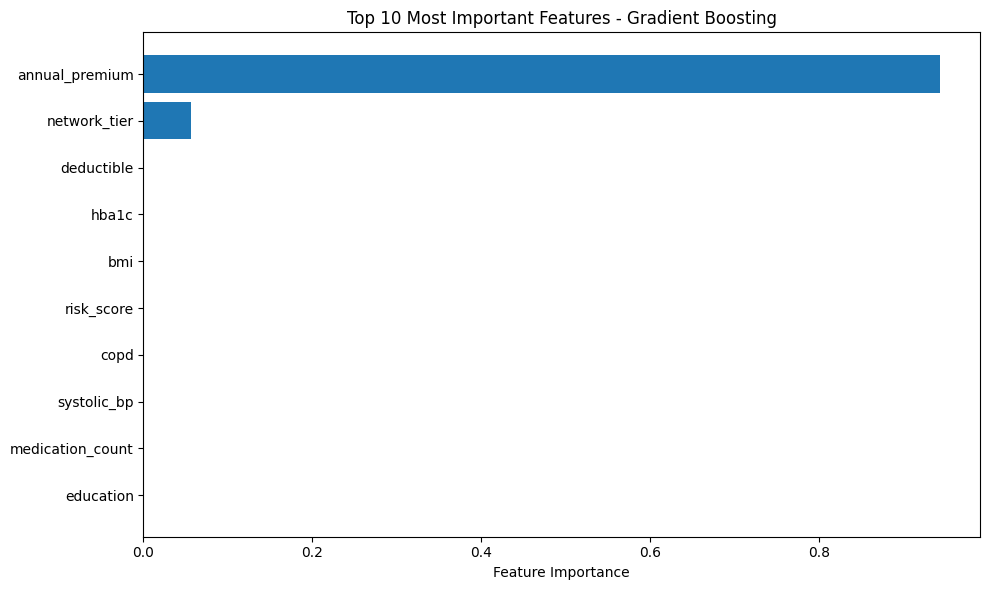

In [10]:
# 使用Gradient Boosting分析特征重要性
if flag_standard:
    scaler1 = StandardScaler()
    # 保存特征名称
    feature_names = X_train2.columns.tolist()
    X_train2 = scaler1.fit_transform(X_train2)
    X_test2 = scaler1.transform(X_test2)
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train2, y_train)

# 获取特征重要性
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("前 10 个重要性特征排序:")
print(feature_importance.head(10))

# 可视化前10个最重要的特征
plt.figure(figsize=(10, 6))

# 取前10个特征
top_10_features = feature_importance.head(10)

plt.barh(top_10_features['feature'], top_10_features['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features - Gradient Boosting')
plt.gca().invert_yaxis()  # 让最重要的特征显示在顶部
plt.tight_layout()
plt.show()

前10个重要特征:
['annual_premium', 'network_tier', 'deductible', 'hba1c', 'bmi', 'risk_score', 'copd', 'systolic_bp', 'medication_count', 'education']

Regression Models Evaluation of some feature:
Model: Linear Regression
模型在训练集上的评估结果：
R2 Score: 0.9633341683110855
MSE Score: 363055.2272278406
MAE Score: 324.55528668890844

模型在测试集上的评估结果：
R2 Score: 0.9651311421404232
MSE Score: 350471.0804093313
MAE Score: 325.73130298084243
--------------------------------------------------
time: 0.02351093292236328

Model: Ridge Regression
模型在训练集上的评估结果：
R2 Score: 0.9633341681006811
MSE Score: 363055.22931120946
MAE Score: 324.5601314383545

模型在测试集上的评估结果：
R2 Score: 0.9651309700721586
MSE Score: 350472.80988813494
MAE Score: 325.73648222785016
--------------------------------------------------
time: 0.014957427978515625

Model: Decision Tree Regression
模型在训练集上的评估结果：
R2 Score: 0.8917767793111696
MSE Score: 1071597.292865753
MAE Score: 393.45900452299594

模型在测试集上的评估结果：
R2 Score: 0.8631952857822252
MSE Score: 13

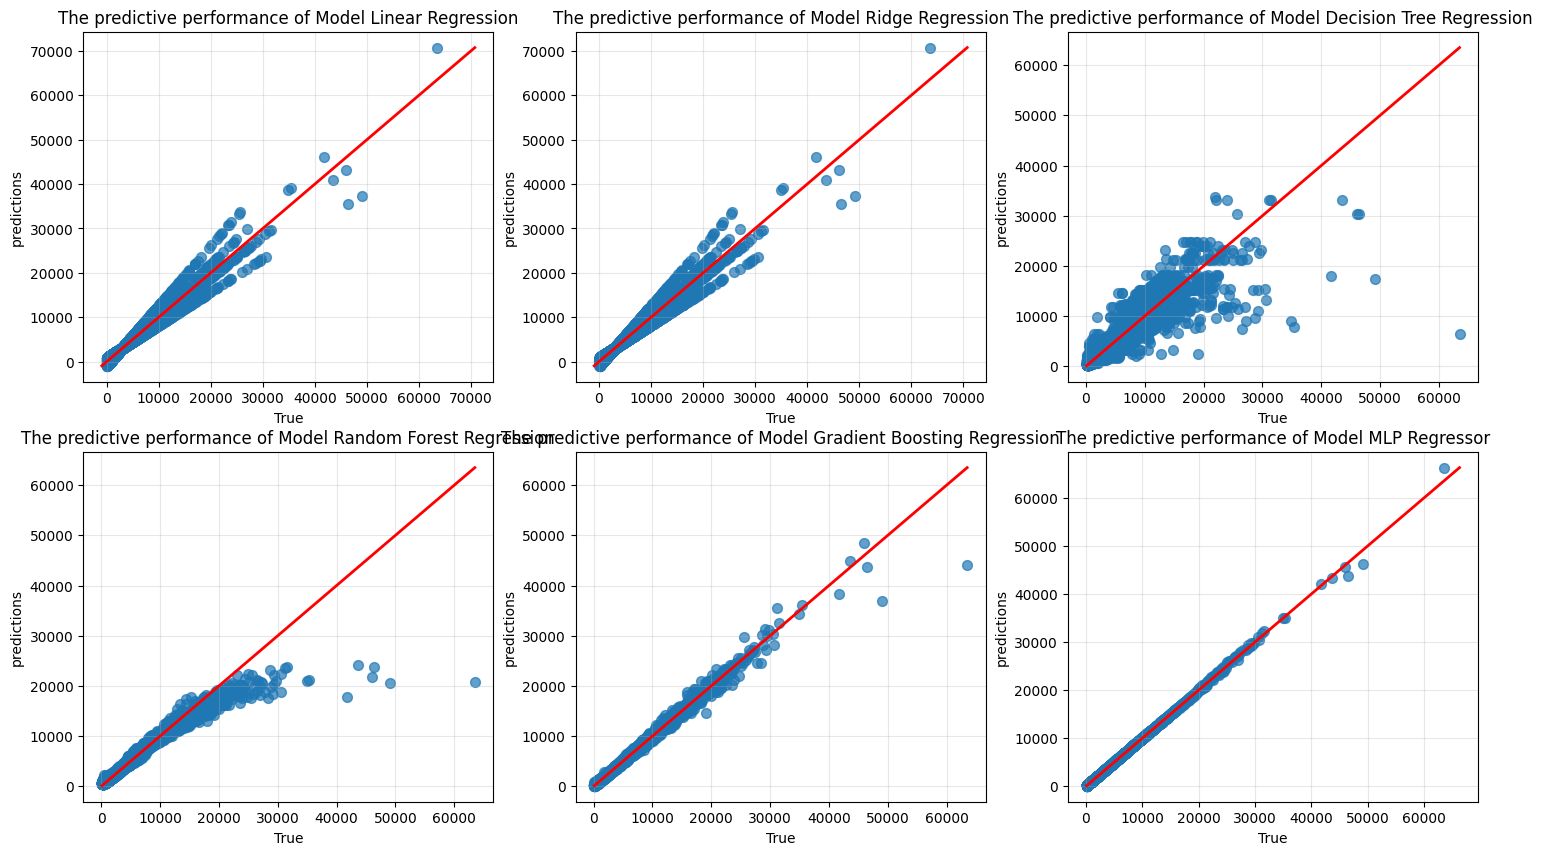

In [11]:
# 获取前10个特征名称
top_10_feature_names = feature_importance.head(10)['feature'].tolist()
print("前10个重要特征:", top_10_feature_names, sep='\n')

# 创建只包含前10个特征的数据集
X_train_top10 = X_train[top_10_feature_names]
X_test_top10 = X_test[top_10_feature_names]  
if flag_standard:
    scaler1 = StandardScaler()
    X_train_top10 = scaler1.fit_transform(X_train_top10)
    X_test_top10 = scaler1.transform(X_test_top10)
# 使用部分的特征进行训练并评估模型
print("\nRegression Models Evaluation of some feature:")
if flag_standard:
    scaler2 = StandardScaler()
    X_train_top10 = scaler2.fit_transform(X_train_top10)
    X_test_top10 = scaler2.transform(X_test_top10)
regression_train(X_train=X_train_top10, X_test=X_test_top10, models=models)


### 只使用 annual_premium 特征


Regression Models Evaluation just of annual_premium feature:
Model: Linear Regression
模型在训练集上的评估结果：
R2 Score: 0.9314471943260172
MSE Score: 678791.4877326679
MAE Score: 478.7834530737076

模型在测试集上的评估结果：
R2 Score: 0.9335450686075611
MSE Score: 667946.5010707038
MAE Score: 480.67582197291495
--------------------------------------------------
time: 0.007538318634033203

Model: Ridge Regression
模型在训练集上的评估结果：
R2 Score: 0.9314471941660882
MSE Score: 678791.4893162412
MAE Score: 478.78890557908784

模型在测试集上的评估结果：
R2 Score: 0.9335448589616716
MSE Score: 667948.6082467322
MAE Score: 480.68171824140336
--------------------------------------------------
time: 0.009531259536743164

Model: Decision Tree Regression
模型在训练集上的评估结果：
R2 Score: 0.9380989997336121
MSE Score: 612927.0953954309
MAE Score: 444.90162484736504

模型在测试集上的评估结果：
R2 Score: 0.9290872178047
MSE Score: 712752.8951738371
MAE Score: 482.6558449816246
--------------------------------------------------
time: 0.11752891540527344

Model: Rand

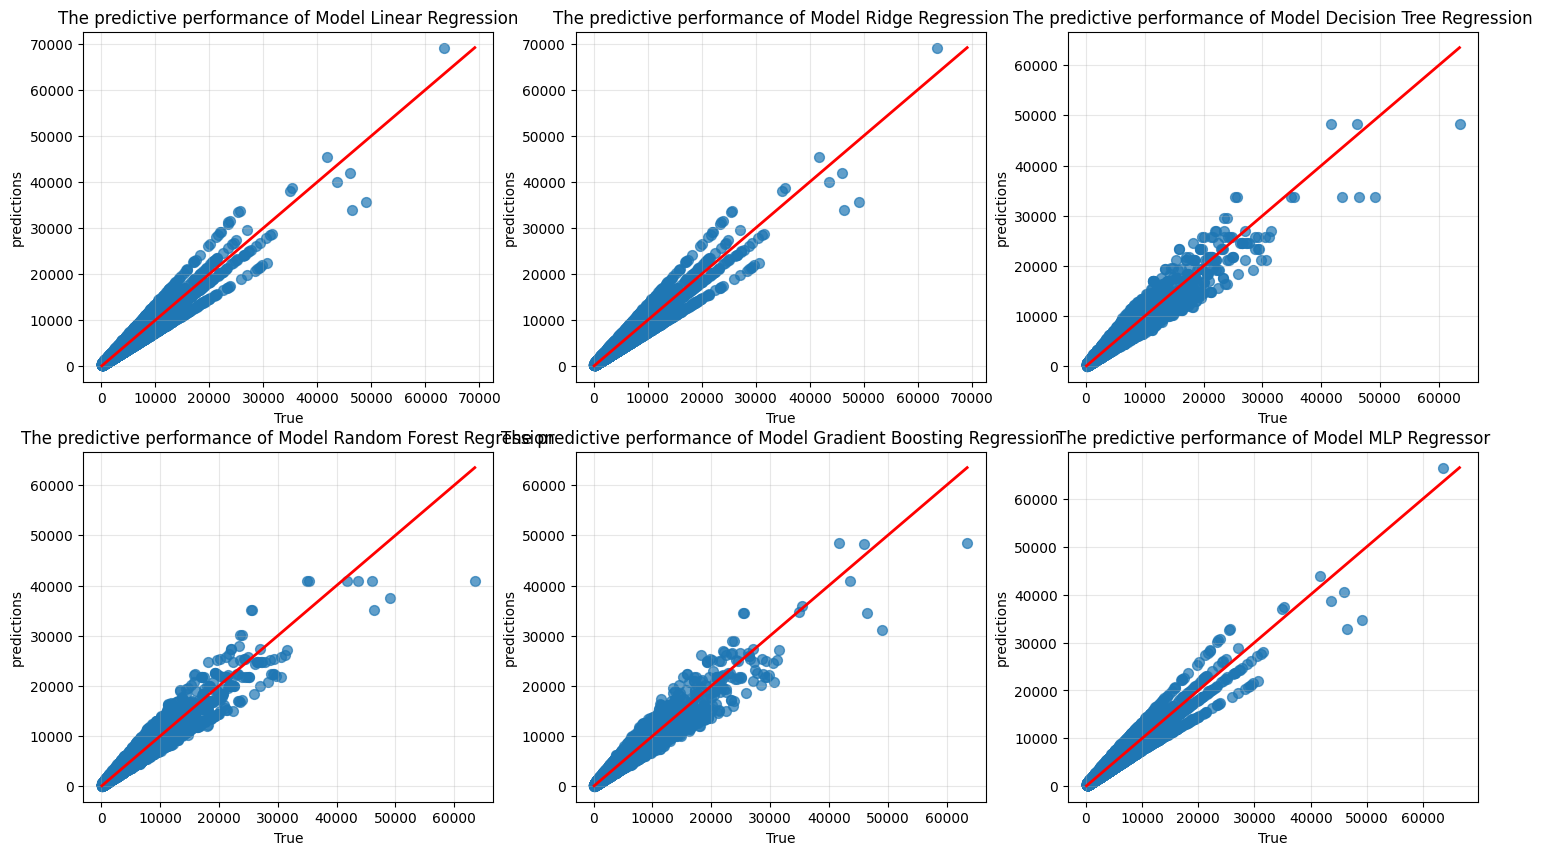

In [12]:
# 只取 annual_premium 特征
X_train_annual_premium = X_train[['annual_premium']]
X_test_annual_premium = X_test[['annual_premium']]

if flag_standard:
    scaler1 = StandardScaler()
    X_train_annual_premium = scaler1.fit_transform(X_train_annual_premium)
    X_test_annual_premium = scaler1.transform(X_test_annual_premium)

# 只使用 annual_premium 特征进行训练并评估模型
print("\nRegression Models Evaluation just of annual_premium feature:")
if flag_standard:
    scaler3 = StandardScaler()
    X_train_annual_premium = scaler3.fit_transform(X_train_annual_premium)
    X_test_annual_premium = scaler3.transform(X_test_annual_premium)
regression_train(X_train=X_train_annual_premium, X_test=X_test_annual_premium, models=models)